<a href="https://colab.research.google.com/github/igcampos/MBrito-Imobiliaria/blob/master/MBrito_Imobiliaria_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto MBrito Imobiliária 

## Entendimento do Negócio
Será criado uma simulação de negócio onde a empresa MBrito Imobiliária está querendo resolver através da análise de dados mercadológicas. 

Os dados foram retirados do kaggle para salientar a simulação de negócio. 

https://www.kaggle.com/harlfoxem/housesalesprediction



**INTRODUÇÃO**

A Mbrito imobiliária está em busca de novas oportunidades de negócios, dentre elas a aquisição de novos empreendimentos a baixos custos para reformar e em seguida vender a preços mais altos e obter bons rendimentos com o negócio. 
Para fazer isso a empresa deve analisar o mercado em busca de oportunidades para lucrar, portanto as seguintes perguntas são necessárias. 

1. **Quais casas o CEO da MBrito Imobiliária deveria comprar e por qual preço de compra?**

*Essa pergunta é importante, porque é nesse momento que a empresa obtém o lucro. Portanto é necessário identificar oportunidades de negócios.*  
2. **Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?**

*O CEO está querendo identificar a maior chance de obter altos rendimentos, logo é necessário identificar o preço que cada imóvel será vendido e estudar se o mercado imobiliário está propicio para venda.* 
3. **A MBrito Imobiliária deveria fazer uma reforma para aumentar o preço da venda?Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**

*É nesse momento que avaliamos se o imóvel adquirido necessita de reformas para alavancar o preço final.* 


In [1]:
#Montando o ambiente colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.ticker as mtick

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Overview dos dados

In [4]:
df_mbrito = pd.read_csv('/content/drive/My Drive/Colab/kc_house_data.csv')

In [5]:
df_mbrito.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Análise das colunas**
* **id**: coluna com dados únicos para identificar cada imóvel (chave primária);
* **date**: coluna com as datas de venda dos imóveis;
* **price**: valores dos imóveis, variável target;
* **bedrooms**: número de quartos em cada imóvel;
* **bathrooms**: número de banheiros em cada imóvel, onde para cada lavabo adiciona .5;
* **sqft_living**: a área construída em pés por quadrado;
* **sqft_lot**: a área total da residência;
* **floors**: o número de pavimentos da residência;
* **waterfront**: coluna com valores binários dizendo se a propriedade tem vista para o mar;
* **view**: coluna com valores de 0 a 4 mostrando quão bonita é a vista da propriedade;
* **condition**: coluna com números de 1 a 5 com as condições dos imóveis;
* **grade**: coluna com valores de qualidade do imóvel, sendo 1 a 3 ruim, 7 médio e 11-13 alta qualidade;
* **sqft_above**: área construída do imóvel dos andares superiores;
* **sqft_basement**: área construída do imóvel que é abaixo do nível da terra;
* **yr_built**: Ano de construção do imóvel;
* **yr_renovated**: Ano que o imóvel foi reformado;
* **zipcode**: código postal do imóvel;
* **lat**: latitude do imóvel;
* **long**: longitude do imóvel;
* **sqft_living15**: área construída das 15 propriedades mais próximas;
* **sqft_lot15**: área total das 15 propriedades mais próximas;


In [6]:
df_mbrito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Devemos transformar a coluna de date de object para datetime e criar duas novas colunas separando em ano e mês. Outra coluna que deve ser criada é a se o imóvel foi renovado ou não, e deve ser binária.

In [7]:
df_mbrito.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
df_mbrito.shape[0] - 21436

177

Quando chamamos a função nunique() a coluna de id que deve ter dados únicos não tem a mesma quantidade de linhas, ou seja em 177 linhas deve existir dados duplicados.

In [9]:
df_mbrito.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Na análise descritiva dos dados numéricos, temos que o número mínimo de quartos e banheiro é igual a zero, devemos analisar se essa propriedade é comercial ou um erro na ingestão do banco de dados.

Outra informação importante é que o ano de construção de certos imóveis mais novos são do ano de 2015, além do ano de reforma que também é de 2015. 

A última informação que retiramos da análise descritiva é que a quantidade máxima de pavimentos é de 3.5, onde o .5 pode ser por que o imóvel tem porão. 

**Plotando a distribuição das variáveis**

In [13]:
plt.style.use('seaborn')

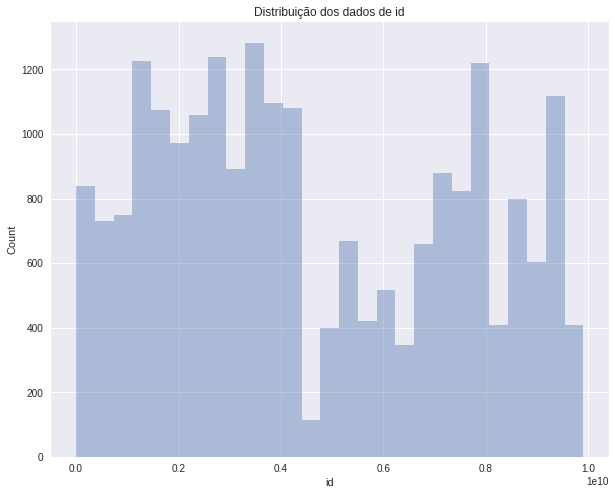

In [28]:
#plotando a distribuição da variável id
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.id, kde=False)

plt.title('Distribuição dos dados de id')
plt.ylabel('Count')
plt.show()

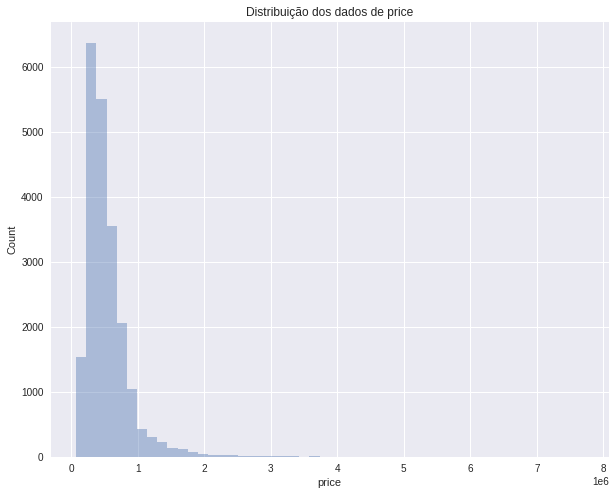

In [30]:
#plotando a distribuição da variável price
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.price, kde=False)

plt.title('Distribuição dos dados de price')
plt.ylabel('Count')
plt.show()

Pela distribuição o grande maioria dos valores dos imóveis estão entre 75 000.00 a 1 000 000.00 com média entre 540 088.00 e o desvio padrão de 367 127.00.

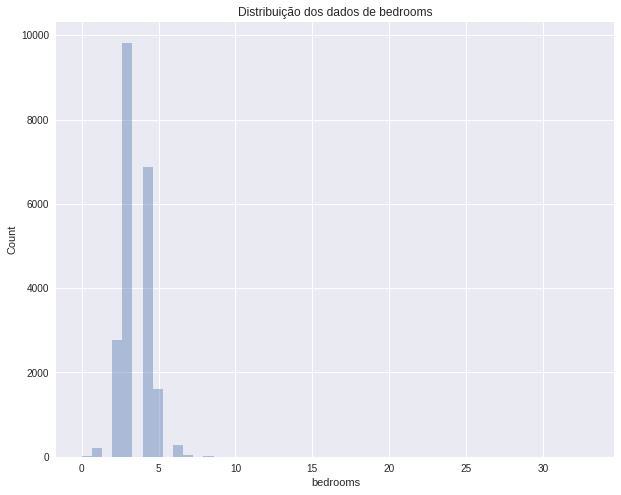

In [14]:
#plotando a distribuição da variável bedrooms
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.bedrooms, kde=False)

plt.title('Distribuição dos dados de bedrooms')
plt.ylabel('Count')
plt.show()

A maioria dos imóveis tem quartos entre 0 e 5, com média de 3.37 e desvio padrão de 0.93.

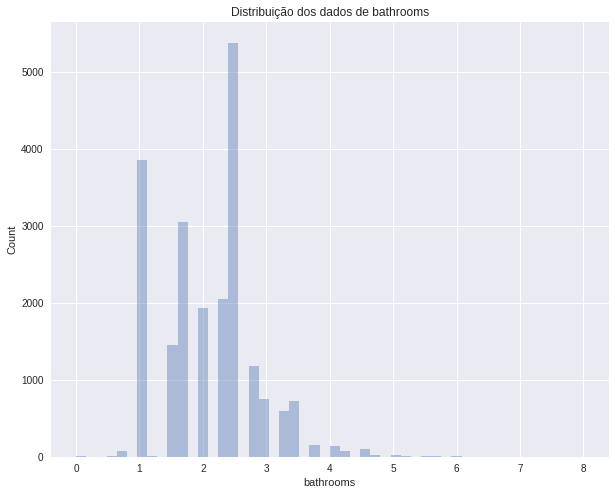

In [15]:
#plotando a distribuição da variável bathrooms 
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.bathrooms, kde=False)

plt.title('Distribuição dos dados de bathrooms')
plt.ylabel('Count')
plt.show()

A maioria dos imóveis tem 1 a 3 banheiros com a média sendo 2.11 e o desvio padrão 0.77.  

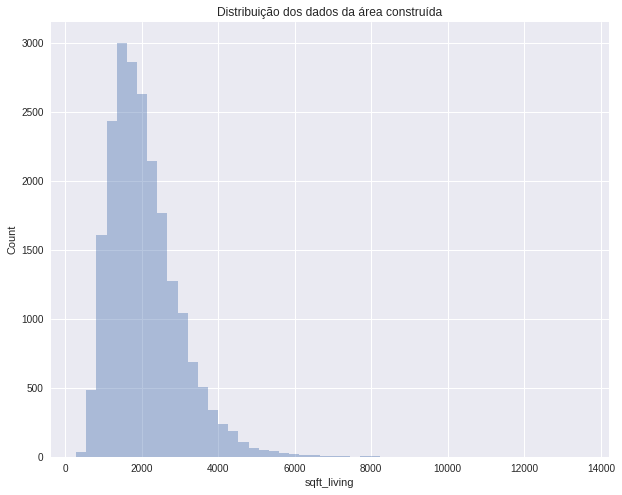

In [16]:
#plotando a distribuição da variável sqft_living
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_living, kde=False)

plt.title('Distribuição dos dados da área construída')
plt.ylabel('Count')
plt.show()

Pelo gráfico podemos notar que a maioria dos imóveis tem área construída entre 290 sqft a 6000 sqft com média sendo 2079.89 sqft e desvio padrão de 918.44 sqft.

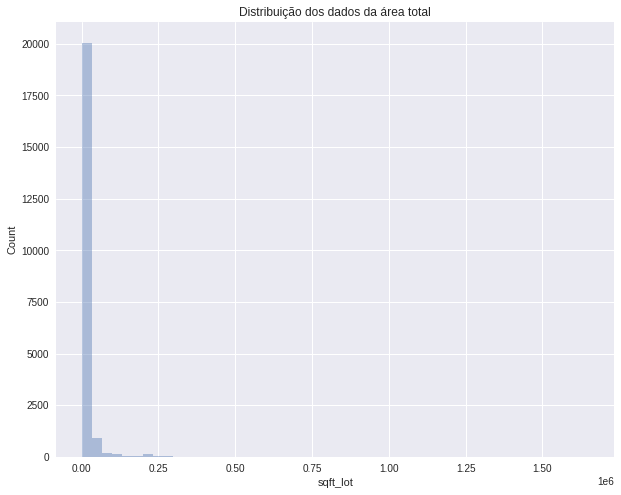

In [17]:
#plotando a distribuição da variável sqft_lot
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_lot, kde=False)

plt.title('Distribuição dos dados da área total')
plt.ylabel('Count')
plt.show()

Pelo gráfico é possivel observar que a maioria da área construída esta em um bin, com média de 15 106.97 sqft e desvio padrão de 41 420.51 sqft. 

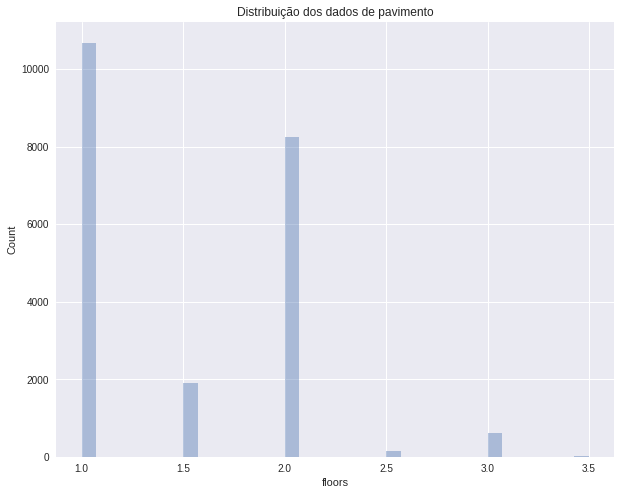

In [18]:
#plotando a distribuição da variável floors
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.floors, kde=False)

plt.title('Distribuição dos dados de pavimento')
plt.ylabel('Count')
plt.show()

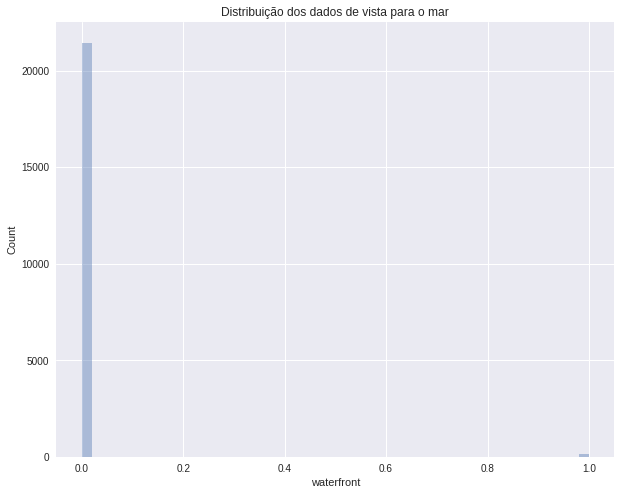

In [19]:
#plotando a distribuição da variável waterfront
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.waterfront, kde=False)

plt.title('Distribuição dos dados de vista para o mar')
plt.ylabel('Count')
plt.show()

Por esse gráfico podemos notar que a grande maioria dos imóveis vendidos não tinham vista para o mar.

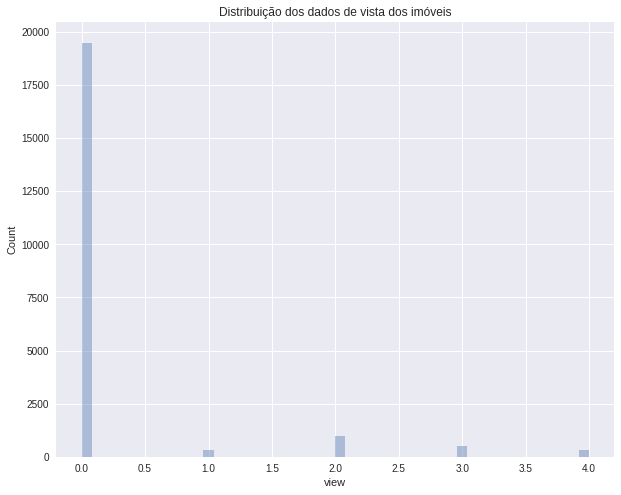

In [20]:
#plotando a distribuição da variável view
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.view, kde=False)

plt.title('Distribuição dos dados de paisagem dos imóveis')
plt.ylabel('Count')
plt.show()

Como no gráfico anterior é possivel notar que a maioria dos imóveis tem uma classificação ruim a cerca da paisagem dos imóveis.  

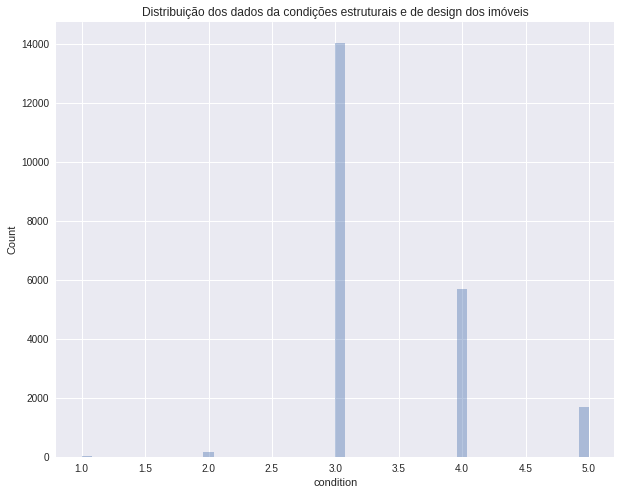

In [21]:
#plotando a distribuição da variável condition
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.condition, kde=False)

plt.title('Distribuição dos dados da condições estruturais e de design dos imóveis')
plt.ylabel('Count')
plt.show()

A maioria dos imóveis tem classificação de 3 com desvio padrão de 0.650743.

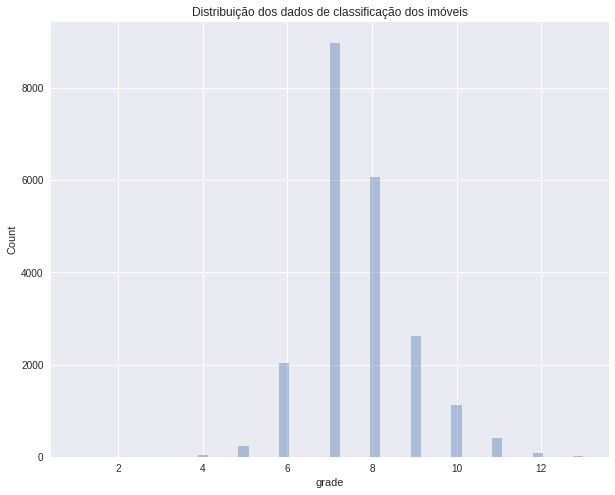

In [24]:
#plotando a distribuição da variável grade
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.grade, kde=False)

plt.title('Distribuição dos dados de classificação dos imóveis')
plt.ylabel('Count')
plt.show()

Pelo gráfico podemos ver que a média de classificação dos imóveis está entre 7 e 8. 

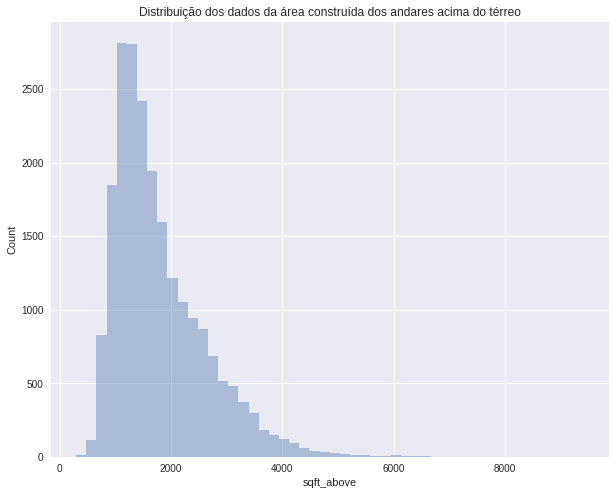

In [25]:
#plotando a distribuição da variável sqft_above
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_above, kde=False)

plt.title('Distribuição dos dados da área construída dos andares acima do térreo')
plt.ylabel('Count')
plt.show()

Pelo gráfico a área construída está entre 290 sqft e 4 000 sqft.

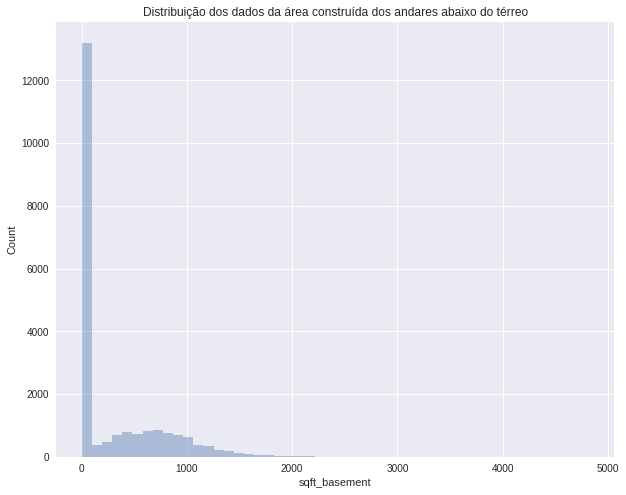

In [26]:
#plotando a distribuição da variável sqft_basement
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_basement, kde=False)

plt.title('Distribuição dos dados da área construída dos andares abaixo do térreo')
plt.ylabel('Count')
plt.show()

Pelo gráfico pode se notar que a maioria dos imóveis não tem andar abaixo do térreo, mas quando tem a área construída fica em média 291.50 sqft e desvio padrão de 442.57 sqft.

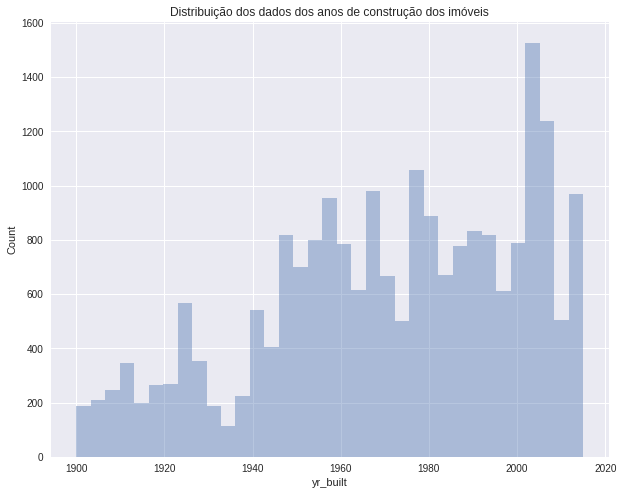

In [27]:
#plotando a distribuição da variável yr_built
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.yr_built, kde=False)

plt.title('Distribuição dos dados dos anos de construção dos imóveis')
plt.ylabel('Count')
plt.show()

Podemos notar que as idades dos imóveis estão bastantes distribuídas entre 1900 e 2015. E a média dos anos de construção entre os imóves é de 1971.

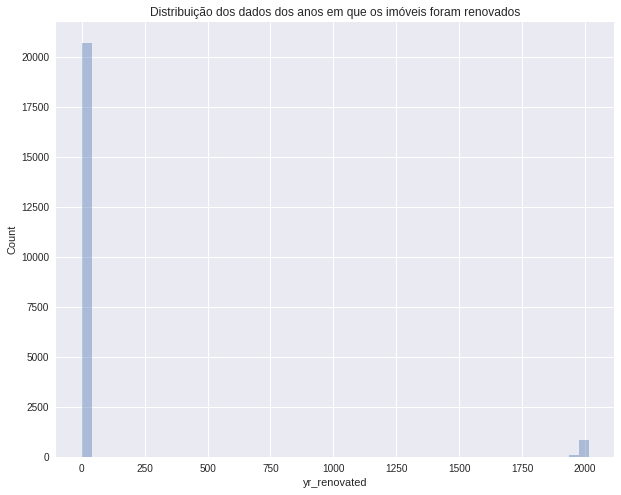

In [28]:
#plotando a distribuição da variável yr_renovated
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.yr_renovated, kde=False)

plt.title('Distribuição dos dados dos anos em que os imóveis foram renovados')
plt.ylabel('Count')
plt.show()

Pelo gráfico a grande maioria não fez nenhum tipo de reforma nas propriedades.

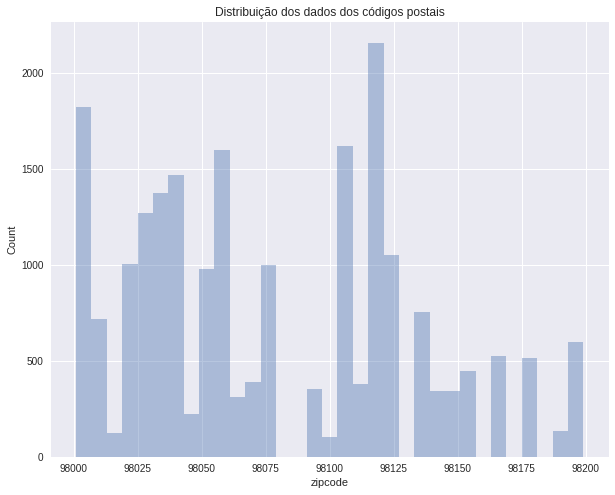

In [29]:
#plotando a distribuição da variável zipcode
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.zipcode, kde=False)

plt.title('Distribuição dos dados dos códigos postais')
plt.ylabel('Count')
plt.show()

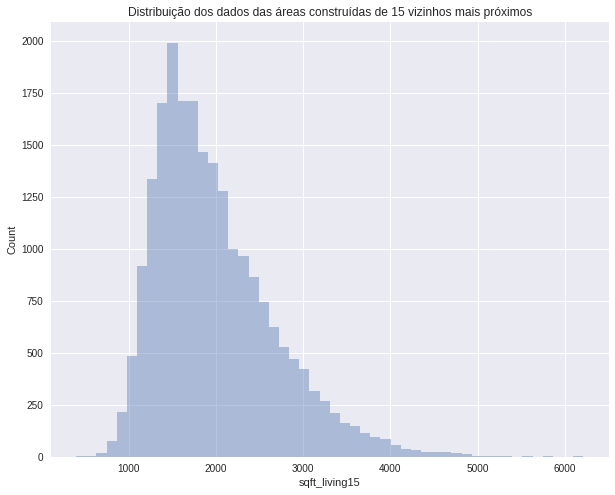

In [30]:
#plotando a distribuição da variável sqft_living15
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_living15, kde=False)

plt.title('Distribuição dos dados das áreas construídas de 15 vizinhos mais próximos')
plt.ylabel('Count')
plt.show()

Pelo gráfico a concentração de áreas construídas dos 15 vizinhos fica entre 1 000 sqft e 4 000 sqft

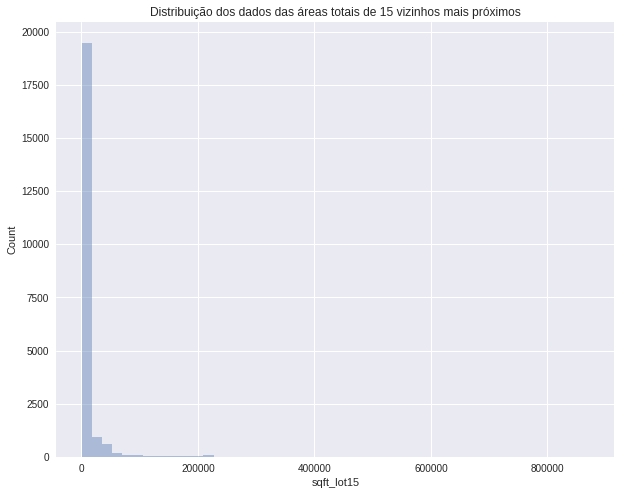

In [31]:
#plotando a distribuição da variável sqft_lot15
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_lot15, kde=False)

plt.title('Distribuição dos dados das áreas totais de 15 vizinhos mais próximos')
plt.ylabel('Count')
plt.show()

### Preparação dos Dados